<a href="https://colab.research.google.com/github/jojosam90/imagesegmentation/blob/main/mask-rcnn_pretrained_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.Install Required Libraries

In [ ]:
!apt-get update
!pip3 install scikit-image==0.16.2
!pip3 install opencv-python
!pip3 install tensorflow==2.1.0
!pip3 install tensorboard==2.1.0
!pip3 install keras==2.3.1
!pip3 install -r requirements.txt

### Verify Installed Libraries

In [45]:
import keras

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential


## 1.Prepare Github data

In [ ]:
!git clone https://github.com/ahmedfgad/Mask-RCNN-TF2.git


### 1.1) View contents of projects

**mrcnn** : contains python for loading and training model 

**kangaroo-transfer-learning** : contains custom data



In [47]:
!ls ./Mask-RCNN-TF2

assets			      maskrcnn_predict_directed_RPN.py	samples
images			      maskrcnn_predict.py		setup.cfg
kangaroo-transfer-learning    mrcnn				setup.py
LICENSE			      mrcnn_directed			test.jpg
MANIFEST.in		      README.md
maskrcnn_predict_directed.py  requirements.txt


In [48]:
!ls ./Mask-RCNN-TF2/kangaroo-transfer-learning

kangaroo  kangaroo_prediction.py  kangaroo_training.py


### 1.2) View the contents of "Kangaroo-transfer-learning" directory.
**kangaroo-transfer-learning** has a folder called kangaroo with the dataset images and their annotations.

In [49]:
%cd ./Mask-RCNN-TF2/kangaroo-transfer-learning/kangaroo
!ls

/content/Mask-RCNN-TF2/Mask-RCNN-TF2/Mask-RCNN-TF2/kangaroo-transfer-learning/kangaroo
annots	images


### 1.3) Go Inside the kangaroo Directory.
The kangaroo directory has 2 folders:

images: The dataset images.
annots: The annotations of the images in xml format.

In [50]:
!ls ./images
!ls ./images -l . | egrep -c '^-' # Count the number of files in the directory. 

00001.jpg  00027.jpg  00052.jpg  00083.jpg  00110.jpg  00137.jpg  00164.jpg
00002.jpg  00028.jpg  00053.jpg  00084.jpg  00111.jpg  00139.jpg  00166.jpg
00003.jpg  00029.jpg  00054.jpg  00085.jpg  00112.jpg  00140.jpg  00167.jpg
00004.jpg  00030.jpg  00055.jpg  00086.jpg  00113.jpg  00141.jpg  00168.jpg
00005.jpg  00031.jpg  00056.jpg  00087.jpg  00114.jpg  00143.jpg  00169.jpg
00006.jpg  00032.jpg  00059.jpg  00088.jpg  00115.jpg  00144.jpg  00170.jpg
00007.jpg  00033.jpg  00060.jpg  00089.jpg  00116.jpg  00145.jpg  00171.jpg
00009.jpg  00034.jpg  00061.jpg  00091.jpg  00117.jpg  00146.jpg  00172.jpg
00010.jpg  00036.jpg  00062.jpg  00092.jpg  00118.jpg  00147.jpg  00173.jpg
00011.jpg  00037.jpg  00064.jpg  00093.jpg  00119.jpg  00148.jpg  00174.jpg
00012.jpg  00038.jpg  00065.jpg  00094.jpg  00120.jpg  00149.jpg  00175.jpg
00013.jpg  00039.jpg  00066.jpg  00095.jpg  00121.jpg  00150.jpg  00176.jpg
00014.jpg  00040.jpg  00069.jpg  00096.jpg  00122.jpg  00151.jpg  00177.jpg
00016.jpg  0

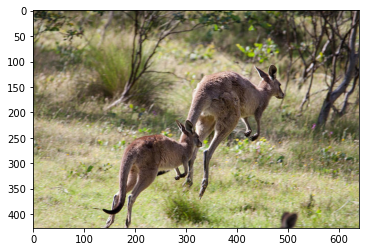

In [51]:
import skimage.io
import matplotlib.pyplot as plt

im_name = "00060"
img = skimage.io.imread("./images/" + im_name + ".jpg")

plt.imshow(img)
plt.show()

### 1.4) Read an xml File
The xml file has information about the image like:

Name
Width
Height
It also has information about each object inside the bndbox element. There is a bndbox element for each object in the image.

The bndbox element has the coordinates of the bounding box surrounding each object:

xmin
ymin
xmax
ymax

In [52]:
!ls ./annots
!ls ./annots -l . | egrep -c '^-' # Count the number of files in the directory

00001.xml  00027.xml  00052.xml  00083.xml  00110.xml  00137.xml  00164.xml
00002.xml  00028.xml  00053.xml  00084.xml  00111.xml  00139.xml  00166.xml
00003.xml  00029.xml  00054.xml  00085.xml  00112.xml  00140.xml  00167.xml
00004.xml  00030.xml  00055.xml  00086.xml  00113.xml  00141.xml  00168.xml
00005.xml  00031.xml  00056.xml  00087.xml  00114.xml  00143.xml  00169.xml
00006.xml  00032.xml  00059.xml  00088.xml  00115.xml  00144.xml  00170.xml
00007.xml  00033.xml  00060.xml  00089.xml  00116.xml  00145.xml  00171.xml
00009.xml  00034.xml  00061.xml  00091.xml  00117.xml  00146.xml  00172.xml
00010.xml  00036.xml  00062.xml  00092.xml  00118.xml  00147.xml  00173.xml
00011.xml  00037.xml  00064.xml  00093.xml  00119.xml  00148.xml  00174.xml
00012.xml  00038.xml  00065.xml  00094.xml  00120.xml  00149.xml  00175.xml
00013.xml  00039.xml  00066.xml  00095.xml  00121.xml  00150.xml  00176.xml
00014.xml  00040.xml  00069.xml  00096.xml  00122.xml  00151.xml  00177.xml
00016.xml  0

### 1.5) Parse an xml File
The following code parses an xml file using the xml module. Based on the bounding box coordinates in the bndbox elements, a bounding box is drawn around each object

In [53]:
import xml

im_name = "00060"
with open("./annots/" + im_name + ".xml") as f:
    print(f.read())

<annotation>
	<folder>Kangaroo</folder>
	<filename>00060.jpg</filename>
	<path>/home/andy/Desktop/Kangaroo/16083178617_e4c90bda77_z.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>640</width>
		<height>427</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>kangaroo</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>300</xmin>
			<ymin>106</ymin>
			<xmax>500</xmax>
			<ymax>369</ymax>
		</bndbox>
	</object>
	<object>
		<name>kangaroo</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>213</ymin>
			<xmax>333</xmax>
			<ymax>425</ymax>
		</bndbox>
	</object>
</annotation>



## 2. Training Steps
Prepare the train and validation datasets by extending the mrcnn.utils.Dataset class.
Prepare the model configuration parameters by extending the mrcnn.config.Config class.
Build the Mask R-CNN model architecture by instantiating the mrcnn.model.MaskRCNN class.
Download and load the pretrained weights.
Train the model.
Save the trained weights.

### 2.1) Extend mrcnn.utils.Dataset Class
The extended class implements 2 methods:

load_dataset(): Groups information (image ID, image path, and annotation file path) about all images in a single dictionary.

load_mask(): Groups the binary masks for all images in a single list.

There are 2 objects in the image.
BBoxes: [[300, 106, 500, 369], [133, 213, 333, 425]]



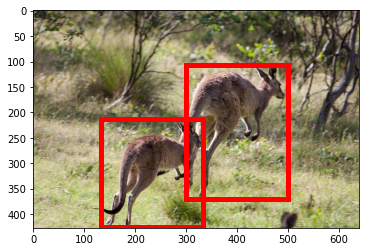

In [54]:
import skimage.io
import matplotlib.pyplot, matplotlib.patches

def extract_boxes(filename):
    tree = xml.etree.ElementTree.parse(filename)
    
    root = tree.getroot()

    boxes = list()
    for box in root.findall('.//bndbox'):
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)

        coors = [xmin, ymin, xmax, ymax]

        boxes.append(coors)

    return boxes

im_name = "00060"
img = skimage.io.imread("./images/" + im_name + ".jpg")

boxes = extract_boxes("./annots/" + im_name + ".xml")
print("There are {count} objects in the image.".format(count=len(boxes)))
print("BBoxes:", boxes, end="\n\n")

fig, ax = matplotlib.pyplot.subplots()
ax.imshow(img)

for box_idx in range(len(boxes)):
    rect = matplotlib.patches.Rectangle((boxes[box_idx][0], boxes[box_idx][1]), 
                                        boxes[box_idx][2]-boxes[box_idx][0], boxes[box_idx][3]-boxes[box_idx][1], 
                                        linewidth=5, 
                                        edgecolor='r', 
                                        facecolor='none')
    ax.add_patch(rect)
plt.show()

In [55]:
%cd ../..

/content/Mask-RCNN-TF2/Mask-RCNN-TF2/Mask-RCNN-TF2


In [63]:
import os
import xml.etree
from numpy import zeros, asarray

import mrcnn
import mrcnn.utils
import mrcnn.config
import mrcnn.model

class KangarooDataset(mrcnn.utils.Dataset):

    def load_dataset(self, dataset_dir, is_train=True):
        self.add_class("dataset", 1, "kangaroo")

        images_dir = dataset_dir + '/images/'
        annotations_dir = dataset_dir + '/annots/'

        for filename in os.listdir(images_dir):
            image_id = filename[:-4]

            if is_train and int(image_id) >= 150:
                continue

            if not is_train and int(image_id) < 150:
                continue

            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'

            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        path = info['annotation']
        boxes, w, h = self.extract_boxes(path)
        masks = zeros([h, w, len(boxes)], dtype='uint8')

        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('kangaroo'))
        return masks, asarray(class_ids, dtype='int32')

    # A helper method to extract the bounding boxes from the annotation file
    def extract_boxes(self, filename):
        tree = xml.etree.ElementTree.parse(filename)

        root = tree.getroot()

        boxes = list()
        for box in root.findall('.//bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)

        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

In [57]:
# Train
train_dataset = KangarooDataset()
train_dataset.load_dataset(dataset_dir='./kangaroo-transfer-learning/kangaroo', is_train=True)
train_dataset.prepare()

# Validation
validation_dataset = KangarooDataset()
validation_dataset.load_dataset(dataset_dir='./kangaroo-transfer-learning/kangaroo', is_train=False)
validation_dataset.prepare()

### 2.2) Extend the mrcnn.config.Config Class
Prepare the model configuration parameters like:

1. The number of classes in the dataset.

2. The number of steps per epoch.

3. The learning rate.

In [64]:
class KangarooConfig(mrcnn.config.Config):
    NAME = "kangaroo_cfg"

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    NUM_CLASSES = 2
    
    LEARNING_RATE = 0.001

    STEPS_PER_EPOCH = 131

### Instantiate the New Class KangarooConfig

In [59]:
kangaroo_config = KangarooConfig()

### 2.3)Build the Mask R-CNN Model Architecture
Instantiate the mrcnn.model.MaskRCNN class.

Remember to set mode=training

In [ ]:
model = mrcnn.model.MaskRCNN(mode='training', 
                             model_dir='./log', 
                             config=kangaroo_config)
model.keras_model.summary()

### 2.4)Download The Pretrained Weights

In [61]:
import urllib.request

urllib.request.urlretrieve("https://github.com/matterport/Mask_RCNN/releases/download/v1.0/mask_rcnn_coco.h5", "mask_rcnn_coco.h5")

('mask_rcnn_coco.h5', <http.client.HTTPMessage at 0x7f69595c9d90>)

#### Load the Weights and Exclude the Top Layers

In [62]:
model.load_weights(filepath='mask_rcnn_coco.h5', 
                   by_name=True, 
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
print("Weights loaded!")

Weights loaded!


### 2.5) Train the Model
Only the model head is trained.

In [ ]:
model.train(train_dataset=train_dataset, 
            val_dataset=validation_dataset, 
            learning_rate=kangaroo_config.LEARNING_RATE, 
            epochs=1, 
            layers='heads') 

### 2.6) Save the Trained Weights

In [9]:
model_path = 'Kangaro_mask_rcnn_trained.h5'
model.keras_model.save_weights(model_path)

NameError: ignored

### 3) Make Predictions

In [ ]:
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os

CLASS_NAMES = ['BG', 'kangaroo']

class SimpleConfig(mrcnn.config.Config):
    NAME = "coco_inference"
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES = len(CLASS_NAMES)

model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

model.load_weights(filepath="Kangaro_mask_rcnn_trained.h5", 
                   by_name=True)

image = cv2.imread("./kangaroo-transfer-learning/kangaroo/images/00060.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])